In [1]:
# importing libraries and importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'events.csv')

In [2]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [4]:
df.shape

(885129, 9)

In [5]:
# converting type of 'event_type' to date
df['event_time'] = pd.to_datetime(df['event_time'])

In [6]:
df = df.sort_values('event_time')

In [7]:
#calculating MAU(MONTH ACTIVE USERS)
mau = df.groupby(df['event_time'].dt.strftime('%m-%y')).agg({'user_id':'nunique'}).reset_index()

In [8]:
#calculating amount of cart events by date
cart_count_users = df[df['event_type']=='cart'].groupby(df['event_time'].dt.strftime('%m-%y')).agg({'user_id':'nunique'}) \
    .reset_index().rename({'user_id':'cart_amount'},axis=1)

In [9]:
cart_count_users

,event_time,cart_amount
0,01-21,8517
1,02-21,7726
2,09-20,1054
3,10-20,6424
4,11-20,7434
5,12-20,6650


In [10]:
#calculating amount of purchase events by date
purchase_count_users = df[df['event_type']=='purchase'] \
    .groupby(df['event_time'].dt.strftime('%m-%y')).agg({'user_id':'nunique'}) \
    .reset_index().rename({'user_id':'purchase_amount'},axis=1)

In [11]:
# joining DataFrames
prep = pd.merge(mau,cart_count_users,how='inner',on='event_time')

In [12]:
cr = pd.merge(prep,purchase_count_users,how='inner',on='event_time')

In [13]:
# calculating conversion rate of cart and purchase
cr['cart_per'] = round(cr['cart_amount']/cr['user_id']*100,2)
cr['purchase_per'] = round(cr['purchase_amount']/cr['user_id']*100,2)

In [14]:
# creating 'month' and 'year' from extracting month,year from date
cr['month'] = cr['event_time'].apply(lambda x:int(x[:2]))
cr['year'] = cr['event_time'].apply(lambda x:int(x[3:]))
cr = cr.sort_values(by=['year','month'])

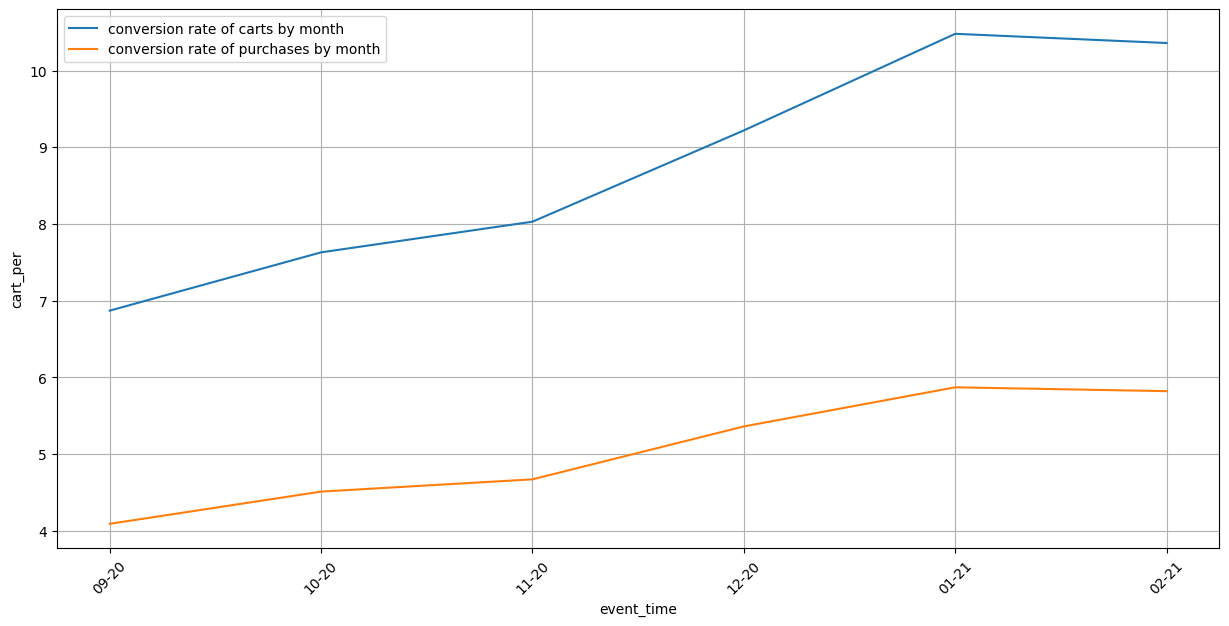

In [15]:
# Visualizing the results
plt.figure(figsize=(15,7))
sns.lineplot(data=cr,x='event_time',y='cart_per',label='conversion rate of carts by month')
sns.lineplot(data=cr,x='event_time',y='purchase_per',label='conversion rate of purchases by month')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [16]:
# calculating WAU(WEEK ACTIVE USERS)
wau = df.groupby(df['event_time'].dt.strftime('%U-%m-%y')).agg({'user_id':'nunique'}).reset_index()

In [17]:
# extracting week,month,year from 'event_time'
wau['week'] = wau['event_time'].apply(lambda x:int(x[:2]))
wau['month'] = wau['event_time'].apply(lambda x:int(x[3:5]))
wau['year'] = wau['event_time'].apply(lambda x:int(x[6:]))

In [18]:
wau

,event_time,user_id,week,month,year
0,00-01-21,3884,0,1,21
1,01-01-21,18234,1,1,21
2,02-01-21,20502,2,1,21
3,03-01-21,20249,3,1,21
4,04-01-21,19563,4,1,21
5,05-01-21,2883,5,1,21
6,05-02-21,18249,5,2,21
7,06-02-21,19876,6,2,21
8,07-02-21,18971,7,2,21
9,08-02-21,17955,8,2,21


In [19]:
wau = wau.sort_values(by=['year','month','week'])

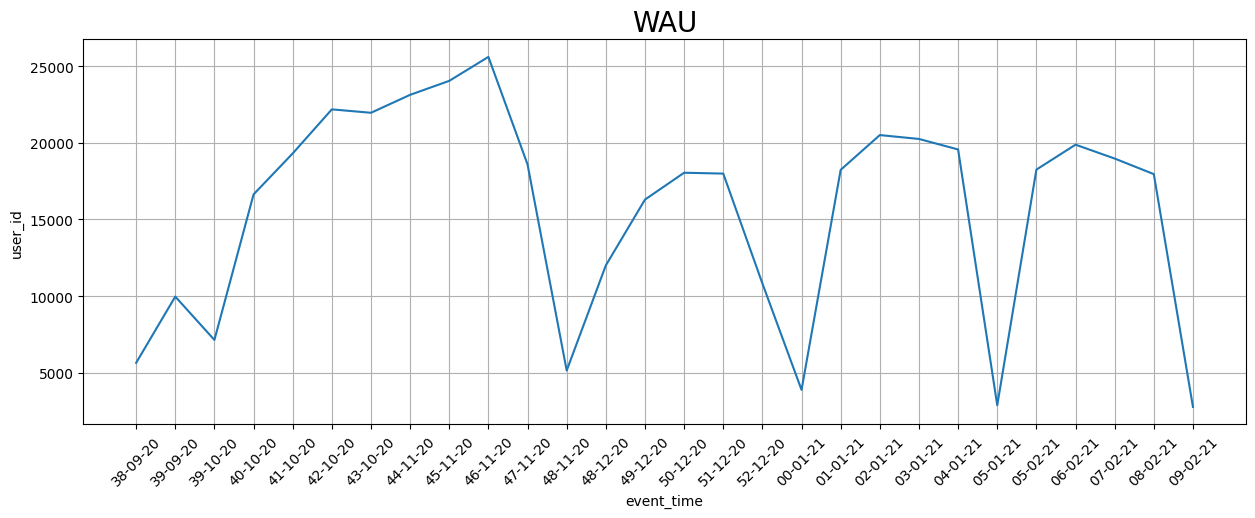

In [20]:
# Visualizing the results
plt.figure(figsize=(15,5))
sns.lineplot(data=wau,x='event_time',y='user_id')
plt.xticks(rotation=45)
plt.grid()
plt.title('WAU',fontsize=20)
plt.show()

# Shopping Cart Abandonment

In [21]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [22]:
# calculating amount of carted items by date and user
items_carted_month = df[df['event_type']=='cart'] \
    .groupby(['user_id',df['event_time'].dt.strftime('%m-%y')]).agg({'product_id':'nunique'}) \
    .reset_index().sort_values('product_id',ascending=False).rename({'product_id':'items_in_cart'},axis=1)

In [23]:
items_carted_month

,user_id,event_time,items_in_cart
25615,1515915625592213549,01-21,36
10192,1515915625536567608,02-21,33
31401,1515915625599634258,02-21,32
17912,1515915625556423168,12-20,29
32560,1515915625601579158,02-21,27
...,...,...,...
15283,1515915625543899154,11-20,1
15282,1515915625543898952,12-20,1
15281,1515915625543898952,11-20,1
2857,1515915625523103635,10-20,1


In [24]:
# calculating amount of bought items by date and user
items_bought_month = df[df['event_type']=='purchase'] \
    .groupby(['user_id',df['event_time'].dt.strftime('%m-%y')]).agg({'product_id':'nunique'}) \
    .reset_index().sort_values('product_id',ascending=False).rename({'product_id':'items_bought'},axis=1)

In [25]:
items_bought_month

,user_id,event_time,items_bought
18822,1515915625601579158,02-21,19
18554,1515915625600723220,02-21,18
18173,1515915625599634258,02-21,17
19107,1515915625603113992,02-21,15
12403,1515915625567754658,12-20,14
...,...,...,...
7584,1515915625540228290,11-20,1
7583,1515915625540223664,11-20,1
7582,1515915625540222786,11-20,1
7581,1515915625540222321,11-20,1


In [26]:
# Joining DataFrames
sca_month = pd.merge(items_bought_month,items_carted_month,how='inner',on=['user_id','event_time'])

In [27]:
sca_month

,user_id,event_time,items_bought,items_in_cart
0,1515915625601579158,02-21,19,27
1,1515915625600723220,02-21,18,19
2,1515915625599634258,02-21,17,32
3,1515915625603113992,02-21,15,18
4,1515915625567754658,12-20,14,15
...,...,...,...,...
20444,1515915625540228290,11-20,1,1
20445,1515915625540223664,11-20,1,1
20446,1515915625540222786,11-20,1,2
20447,1515915625540222321,11-20,1,1


In [28]:
# Counting the number of abandonments
abandonment = sca_month[sca_month['items_bought']<sca_month['items_in_cart']]['event_time'].value_counts().reset_index()

In [29]:
abandonment

,index,event_time
0,01-21,450
1,02-21,427
2,11-20,224
3,12-20,220
4,10-20,163
5,09-20,25


In [30]:
# Counting the number of events
event_amount = sca_month['event_time'].value_counts().reset_index()

In [31]:
# Merging Data
sca = pd.merge(abandonment,event_amount,on='index') \
    .rename({'index':'event_time','event_time_x':'not_bought_amount','event_time_y':'bought_amount'},axis=1)

In [32]:
# Calculating SCA percentage
sca['sca_per'] = round(sca['not_bought_amount']/sca['bought_amount']*100,2)

In [33]:
sca['month'] = sca['event_time'].apply(lambda x:int(x[:2]))
sca['year'] = sca['event_time'].apply(lambda x:int(x[3:]))
sca = sca.sort_values(by=['year','month'])

In [34]:
sca

,event_time,not_bought_amount,bought_amount,sca_per,month,year
5,09-20,25,572,4.37,9,20
4,10-20,163,3545,4.60,10,20
2,11-20,224,4144,5.41,11,20
3,12-20,220,3673,5.99,12,20
0,01-21,450,4476,10.05,1,21
1,02-21,427,4039,10.57,2,21


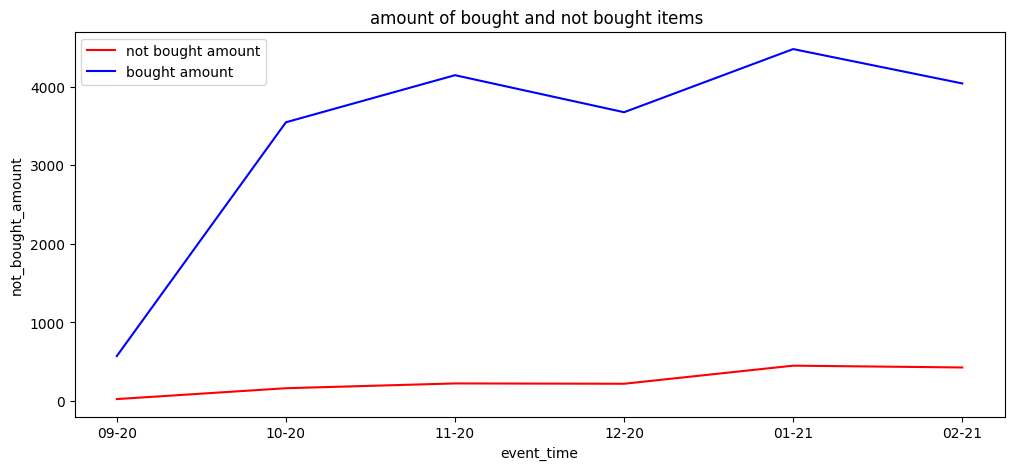

In [53]:
plt.figure(figsize=(12,5))
sns.lineplot(data=sca,x='event_time',y='not_bought_amount',color='red',label = 'not bought amount')
sns.lineplot(data=sca,x='event_time',y='bought_amount',color='blue',label='bought amount')
plt.title('amount of bought and not bought items ')
plt.legend()
plt.show()

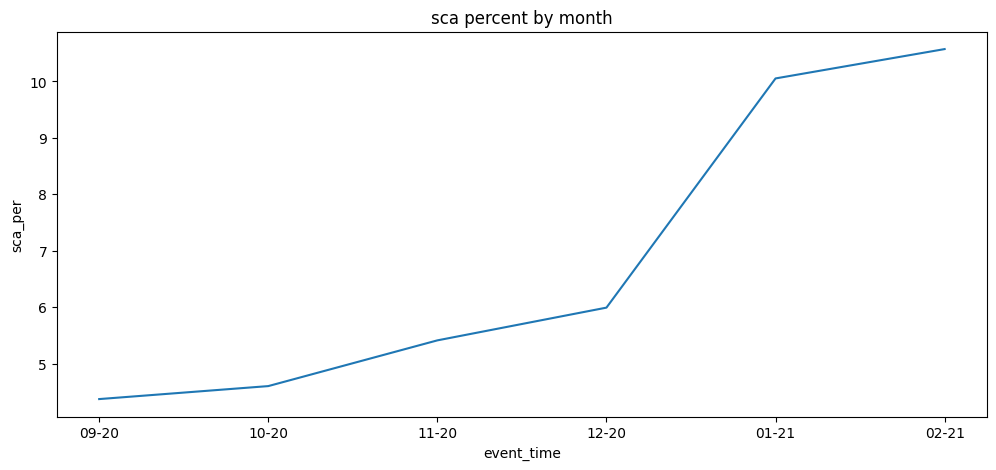

In [36]:
plt.figure(figsize=(12,5))
sns.lineplot(data=sca,x='event_time',y='sca_per')
plt.title('sca percent by month')
plt.show()

# average order value

In [37]:
total_aov = round(df[df['event_type']=='purchase']['price'].mean())
print('AOV :',total_aov,'$')

AOV : 137 $


In [38]:
# calculating the AOV by month
aov_month = df[df['event_type']=='purchase'].groupby(df['event_time'].dt.strftime('%m-%y')) \
    .agg({'price':'mean'}).reset_index()

In [39]:
aov_month

,event_time,price
0,01-21,179.003075
1,02-21,180.140722
2,09-20,95.683227
3,10-20,89.641554
4,11-20,104.025118
5,12-20,124.535273


In [40]:
aov_month['month'] = aov_month['event_time'].apply(lambda x:int(x[:2]))
aov_month['year'] = aov_month['event_time'].apply(lambda x:int(x[3:]))
aov_month = aov_month.sort_values(by=['year','month'])

In [41]:
aov_month

,event_time,price,month,year
2,09-20,95.683227,9,20
3,10-20,89.641554,10,20
4,11-20,104.025118,11,20
5,12-20,124.535273,12,20
0,01-21,179.003075,1,21
1,02-21,180.140722,2,21


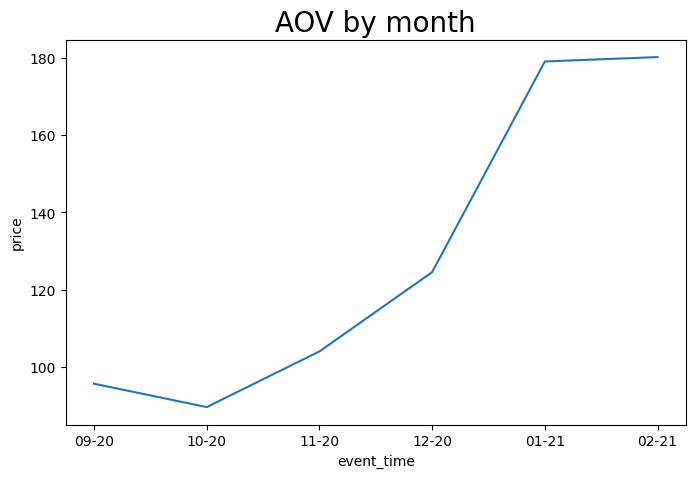

In [42]:
plt.figure(figsize=(8,5))
sns.lineplot(data = aov_month,x='event_time',y='price')
plt.title('AOV by month',fontsize=20)
plt.show()

In [43]:
# number of site visiting by hour
views_hours = df[df['event_type']=='view'].groupby(df['event_time'].dt.hour) \
        .agg({'event_time':'count'}).rename({'event_time':'count'},axis=1).reset_index()

In [44]:
# number of cart-action by hour
cart_hours = df[df['event_type']=='cart'].groupby(df['event_time'].dt.hour) \
        .agg({'event_time':'count'}).rename({'event_time':'count'},axis=1).reset_index()
# number of purchase-action by hour
purchase_hours = df[df['event_type']=='purchase'].groupby(df['event_time'].dt.hour) \
        .agg({'event_time':'count'}).rename({'event_time':'count'},axis=1).reset_index()

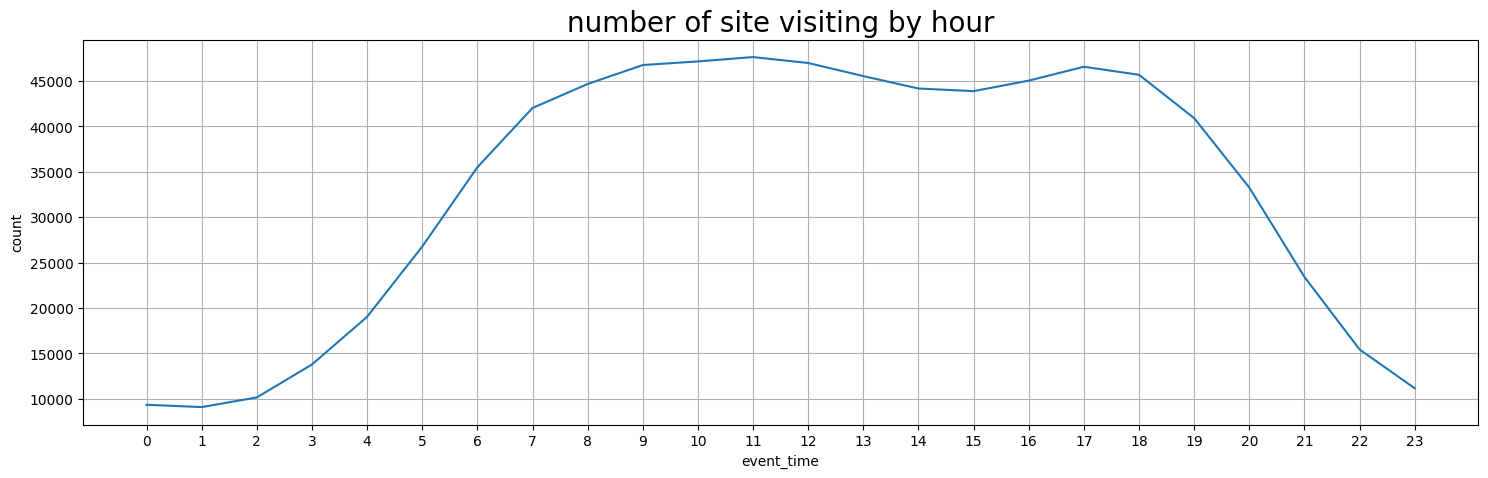

In [45]:
plt.figure(figsize=(18,5))
sns.lineplot(data=views_hours,x='event_time',y='count')
plt.title('number of site visiting by hour',fontsize=20)
plt.xticks(list(range(24)))
plt.grid()
plt.show()

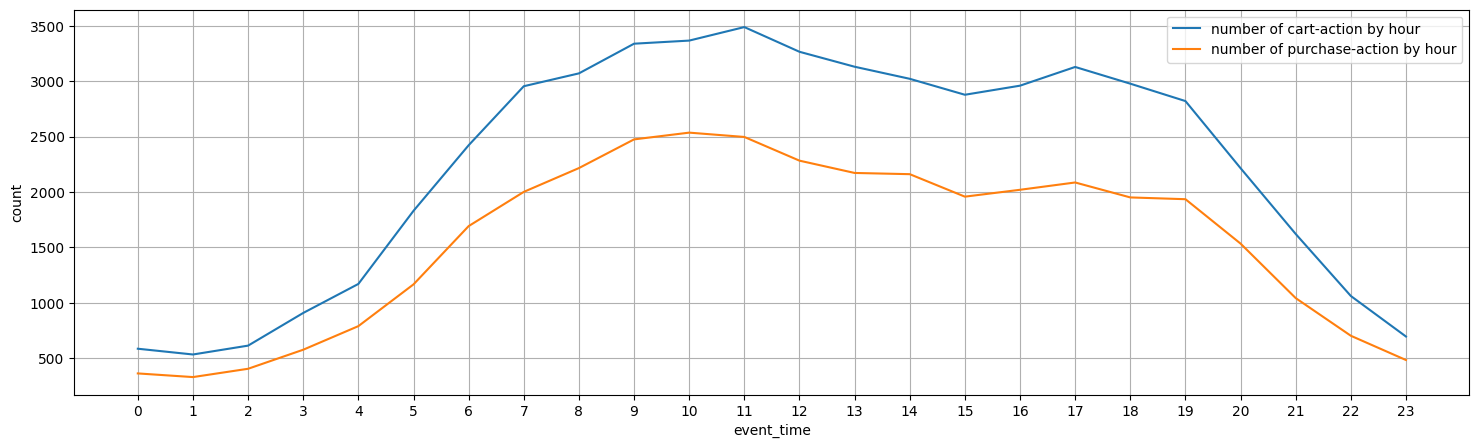

In [56]:
plt.figure(figsize=(18,5))
sns.lineplot(data=cart_hours,x='event_time',y='count',label = 'number of cart-action by hour' )
sns.lineplot(data=purchase_hours,x='event_time',y='count',label='number of purchase-action by hour')
plt.xticks(list(range(24)))
plt.grid()
plt.legend()
plt.show()